![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

### Penguin Species

#### Adelie Penguin
![Adelie Penguin](Adelie.png)
The Adelie Penguin is a species of penguin common along the entire Antarctic coast. They are known for their distinctive white ring around the eye.

#### Chinstrap Penguin
![Chinstrap Penguin](chinstrap.png)
The Chinstrap Penguin is easily recognized by the narrow black band under its head, which makes it appear as if it is wearing a black helmet.

#### Gentoo Penguin
![Gentoo Penguin](Gentoo.png)
The Gentoo Penguin is known for its bright orange-red bill and the white patch above its eyes. They are the fastest underwater swimmers of all penguins.

In [60]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [61]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [62]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [63]:
penguins_df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

**Data Preprocessing**

In [64]:
#Transforming the categorical data to numerical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(penguins_df[["sex"]]).toarray()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())
penguins_df_encoded = pd.concat([penguins_df, one_hot_encoded_df], axis=1)
penguins_df_encoded

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,MALE,0.0,1.0
1,39.5,17.4,186.0,3800.0,FEMALE,1.0,0.0
2,40.3,18.0,195.0,3250.0,FEMALE,1.0,0.0
3,36.7,19.3,193.0,3450.0,FEMALE,1.0,0.0
4,39.3,20.6,190.0,3650.0,MALE,0.0,1.0
...,...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE,1.0,0.0
328,46.8,14.3,215.0,4850.0,FEMALE,1.0,0.0
329,50.4,15.7,222.0,5750.0,MALE,0.0,1.0
330,45.2,14.8,212.0,5200.0,FEMALE,1.0,0.0


In [65]:
# Drop the original column : sex
penguins_df_encoded.drop(columns='sex', axis=1, inplace=True)
penguins_df_encoded.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,0.0,1.0


In [57]:
scaler = StandardScaler()
penguins_scaled = pd.DataFrame(scaler.fit_transform(penguins_df_encoded), columns=penguins_df_encoded.columns)
penguins_scaled.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


Text(0.5, 1.0, 'Elbow Method')

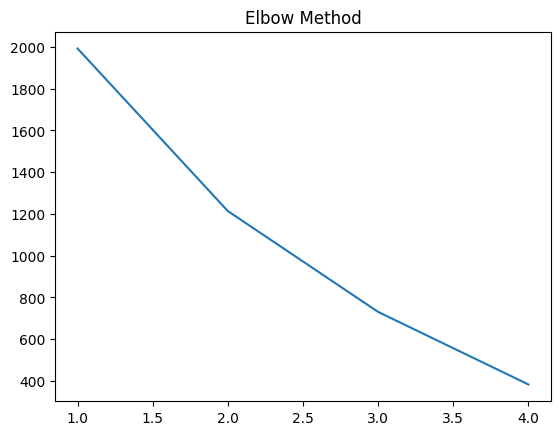

In [66]:
#Elbow Analysis for finding Optimal Number of Clusters
wcss = [] # Within-Cluster Sum of Squares or inertia
for i in range(1,5): 
    kmeans= KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(penguins_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,5), wcss)
plt.title('Elbow Method')

In [67]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(penguins_scaled)
penguins_df['cluster'] = kmeans.labels_
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,0


In [70]:
numerical_columns = penguins_df.select_dtypes(include=['float64'])
numerical_columns.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [71]:
penguins_df.groupby('cluster')[numerical_columns.columns].mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,47.568067,14.996639,217.235294,5092.436975
2,40.217757,17.611215,189.046729,3419.158879


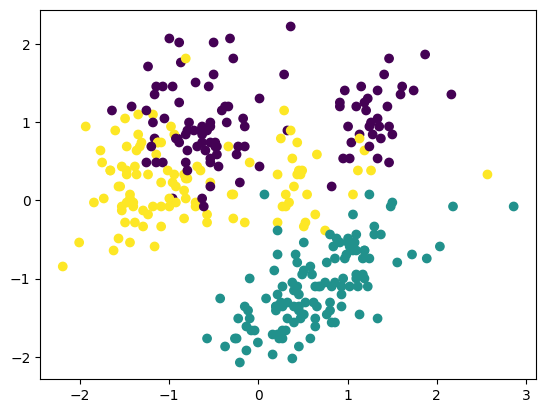

In [73]:
# Visualizing the Clusters
plt.scatter(penguins_scaled['culmen_length_mm'], penguins_scaled['culmen_depth_mm'], c=penguins_df['cluster'], cmap='viridis')

Gentoo is known to be the heaviest penguin species with the longest flippers so it is the cluster 1 represented by the color green on the graph. It also has the smallest culmen depth. 